<a href="https://colab.research.google.com/github/Tomiwa29/tomiwa/blob/master/Detecting%20Suspicious%20transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Scenario:


Goal:
Detect suspicious transactions using Ml



# **Importing necessary liberies**

In [5]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport


In [7]:
# Reading the Dataset

df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
192588,13,CASH_IN,408313.37,C437943627,3441357.55,3849670.91,C1970559605,694470.70,286157.33,0.0,0.0
192589,13,CASH_IN,132941.53,C248425845,3849670.91,3982612.44,C1721892488,2565275.25,2432333.72,0.0,0.0
192590,13,CASH_IN,189213.75,C960327564,3982612.44,4171826.19,C1495001462,4851384.58,5424905.46,0.0,0.0
192591,13,CASH_IN,154029.98,C1300187685,4171826.19,4325856.17,C729214165,1211596.13,1057566.15,0.0,0.0
192592,13,CASH_IN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()
# is a Pandas method that computes a summary of statistics for each column in a DataFrame. It returns a new DataFrame containing the following statistics:
#count: the number of non-null values in each column mean: the mean of each column std: the standard deviation of each column min: the minimum value in each column 50%: the 50th percentile (median) of each column 75%: the 75th percentile of each column max: the maximum value in each column
#This method can be useful for gaining a quick understanding of the distribution of values in each column of a DataFrame, and for detecting potential issues such as missing or outlier values.



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,192593.000000,1.925930e+05,1.925920e+05,1.925920e+05,1.925920e+05,1.925920e+05,192592.000000,192592.0
mean,9.953046,1.808083e+05,8.856633e+05,9.035205e+05,9.373857e+05,1.192429e+06,0.000743,0.0
std,2.081126,3.308757e+05,2.781981e+06,2.819402e+06,2.371167e+06,2.661279e+06,0.027239,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.192803e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.795119e+04,1.945550e+04,0.000000e+00,4.977150e+04,1.288272e+05,0.000000,0.0
75%,11.000000,2.286971e+05,1.929185e+05,2.282370e+05,7.564436e+05,1.186557e+06,0.000000,0.0
max,13.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [10]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [11]:
df.shape

(192593, 11)

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [13]:
df.isnull().values.any()

True

In [14]:
list(df.loc[df.isFraud == 0].type.drop_duplicates().values)

['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN']

In [15]:
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)

['TRANSFER', 'CASH_OUT']

In [16]:
dft = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfc = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

In [17]:
#Number of fraudulent TRANSFER
len(dft)

70

In [18]:
#Number of fraudulent CASH_OUT
len(dfc)

73

In [19]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [20]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['nameOrig']=le.fit_transform(df['nameOrig'])
df['type']=le.fit_transform(df['type'])
df['nameDest']=le.fit_transform(df['nameDest'])

df.head(9)
# 3 is payment 4 is TRANSFER 1 is CASHOUT

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,22926,170136.00,160296.36,56790,0.0,0.0,0.0,0.0
1,1,3,1864.28,66003,21249.00,19384.72,59134,0.0,0.0,0.0,0.0
2,1,4,181.00,30224,181.00,0.00,15996,0.0,0.0,1.0,0.0
3,1,1,181.00,176600,181.00,0.00,14224,21182.0,0.0,1.0,0.0
4,1,3,11668.14,103732,41554.00,29885.86,29133,0.0,0.0,0.0,0.0
5,1,3,7817.71,182519,53860.00,46042.29,75918,0.0,0.0,0.0,0.0
6,1,3,7107.77,54417,183195.00,176087.23,69891,0.0,0.0,0.0,0.0
7,1,3,7861.64,90252,176087.23,168225.59,78128,0.0,0.0,0.0,0.0
8,1,3,4024.36,26238,2671.00,0.00,27205,0.0,0.0,0.0,0.0


We check if their is a good proportion between our positive and negative binary predictor.

In [22]:
df['isFraud'].value_counts()
#This means that there are 137993 rows where the value in the isFraud column is 0 and 122 rows where the value is 1.

0.0    192449
1.0       143
Name: isFraud, dtype: int64

# Create a histogram of transaction amounts
plt.hist(df['transaction_amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

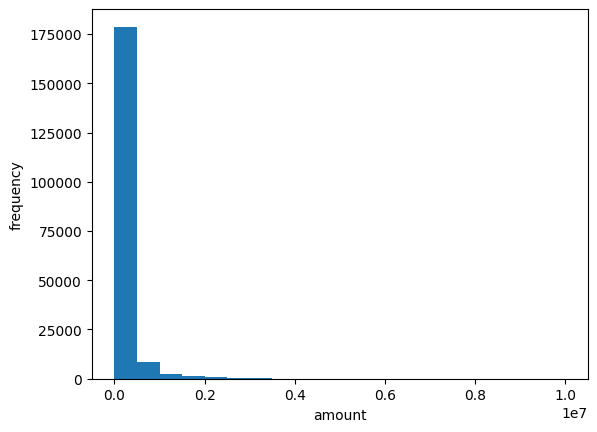

In [23]:
# Create a histogram of transaction amounts
plt.hist(df['amount'], bins=20)
plt.xlabel('amount')
plt.ylabel('frequency')
plt.show()

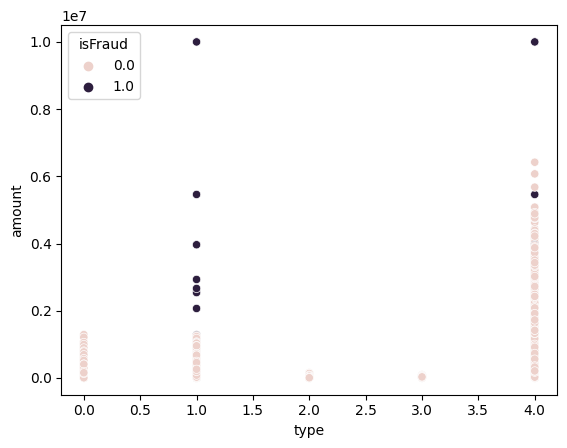

In [24]:
# Create a scatterplot of transaction amounts by time
sns.scatterplot(x='type', y='amount', hue='isFraud', data=df)
plt.show()

### Correlation Matrix
Correlation Matrix lets you see correlations between all variable. How highly or weak each variable is related to each other.

In [25]:
fraud_people = df[df['isFraud']==1]
legit_people = df[df['isFraud']==0]

In [26]:
fraud_people.shape

(143, 11)

In [27]:
legit_people.shape

(192449, 11)

In [28]:
fraud_people['amount'].describe()

count    1.430000e+02
mean     5.967428e+05
std      1.488027e+06
min      1.640000e+02
25%      1.370556e+04
50%      3.506363e+04
75%      3.561327e+05
max      1.000000e+07
Name: amount, dtype: float64

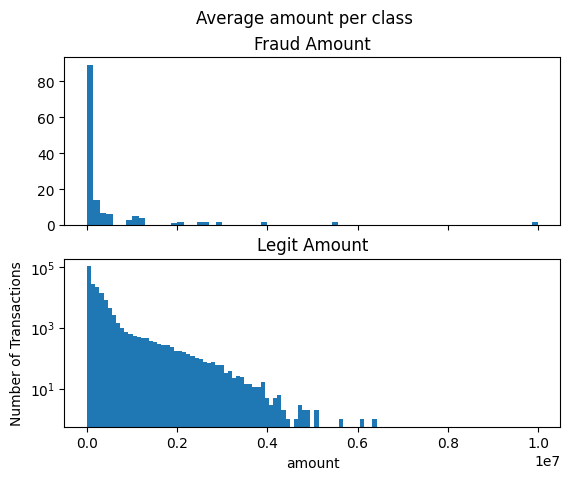

In [29]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex = True)
graph.suptitle("Average amount per class")
bins = 70

plot1.hist(fraud_people['amount'], bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(legit_people['amount'], bins = bins)
plot2.set_title('Legit Amount')

plt.xlabel('amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [30]:
columns = df.columns.tolist()
columns = [var for var in columns if var not in ["isFraud"]] #independent
target = "isFraud"
x = df[columns]
y = df[target] #dependent

In [31]:
x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)

<ipython-input-31-9c04b7e9c924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)


In [32]:
x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)

<ipython-input-32-1829776b8fa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)


In [33]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [34]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


By comparing positve and negative patients, we can see there are vast differences in means for many of our 13 features.

In [35]:
# Add random noise to the features
noise = np.random.normal(loc=0, scale=0.1, size=x.shape)  # Adjust the noise scale as needed
x_noisy = x + noise

# Introduce outliers
outliers = np.random.uniform(low=-10, high=10, size=(10, x.shape[1]))  # Generate 10 outlier instances
x_outliers = np.concatenate((x, outliers), axis=0)
y_outliers = np.concatenate((y, np.ones((10,))), axis=0)


## Prepare Data for Modeling
To prepare data for modeling, remember ASN (Assign, Split, Normalize)

In [36]:
print(df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [37]:
df.dropna(subset=['isFraud'], inplace=True)


In [38]:
missing_values = y.isnull().sum()
print("Missing values in y:", missing_values)


Missing values in y: 1


In [39]:
from sklearn.impute import SimpleImputer

# Impute missing target value using mean imputation
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))


In [40]:
print(y.describe())


count    192592.000000
mean          0.000743
std           0.027239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64


In [41]:
print(y[y.isnull()])


192592   NaN
Name: isFraud, dtype: float64


In [42]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in y
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

# Convert back to a pandas Series
y_imputed = pd.Series(y_imputed.flatten(), index=y.index)


In [43]:

from sklearn.preprocessing import Binarizer

# Initialize Binarizer
binarizer = Binarizer(threshold=0.5)  # Adjust the threshold as needed

# Binarize the target variable
y_binarized = binarizer.fit_transform(y_imputed.values.reshape(-1, 1))

# Convert back to a pandas Series
y_binarized = pd.Series(y_binarized.flatten(), index=y.index)


In [44]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
resampler = RandomOverSampler()

# Resample the data
x_resampled, y_resampled = resampler.fit_resample(x, y_binarized)


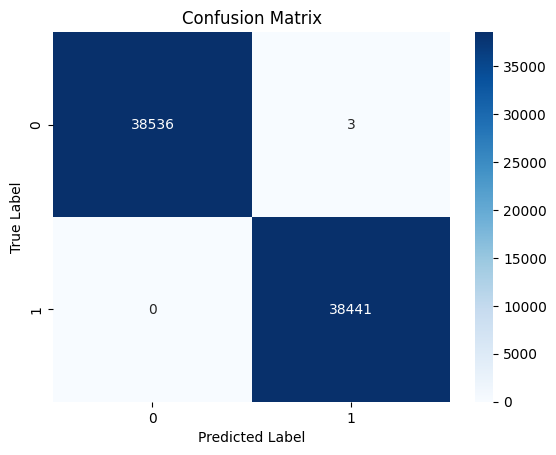

Accuracy: 0.9999610288386593
Precision: 0.9999219644157736
Recall: 1.0
F1-score: 0.9999609806854394
Mean Absolute Error: 3.897116134060795e-05
Mean Squared Error: 3.897116134060795e-05
R^2 Score: 0.9998441151019986


In [98]:
#blahhhh
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize RandomOverSampler
resampler = RandomOverSampler()

# Resample the data
x_resampled, y_resampled = resampler.fit_resample(x, y_binarized)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_resampled
x_resampled_imputed = imputer.fit_transform(x_resampled)

# Split the resampled and imputed data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled_imputed, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the training set
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save the figure as an image
plt.savefig('confusion_matrix.png')

# Show the plot
plt.show()

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)



2406/2406 [==============================] - 3s 1ms/step


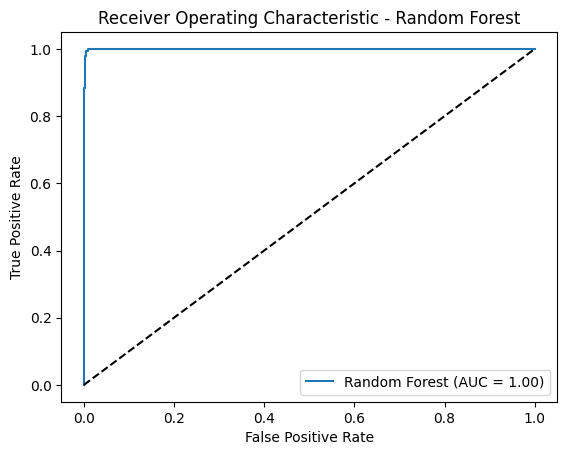

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class
y_pred_proba_rf = model.predict(x_test)
y_pred_proba_rf = y_pred_proba_rf.flatten()  # Flatten the predictions to a 1D array

# Calculate false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate the AUC score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.5319017926734216


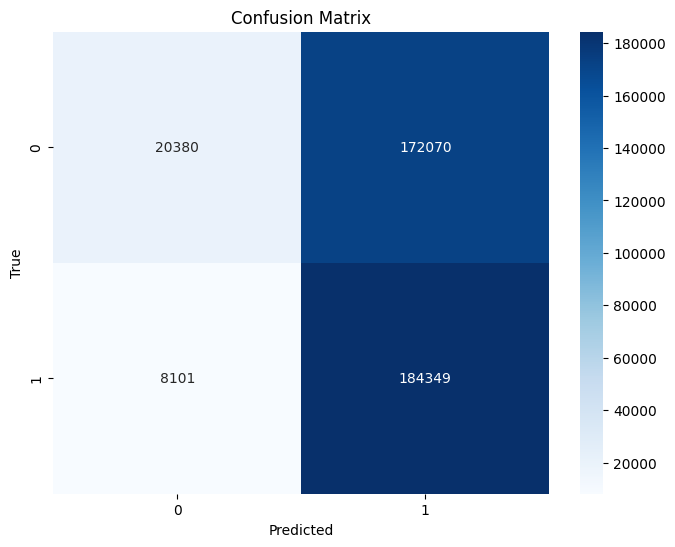

Precision: 0.5172255126690777
Recall: 0.957905949597298
F1-score: 0.6717413444738181
Mean Absolute Error: 0.4680982073265783
Mean Squared Error: 0.4680982073265783
R^2 Score: -0.8723928293063132


In [101]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit K-means clustering algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_resampled_imputed)

# Predict cluster labels
cluster_labels = kmeans.predict(x_resampled_imputed)

# If ground truth labels are not available, calculate accuracy using an alternative method
if 'target_variable' not in y_resampled:
    # Calculate the majority label in each cluster
    cluster_majority_label = []
    for cluster in range(2):
        cluster_samples = y_resampled[cluster_labels == cluster]
        cluster_majority_label.append(cluster_samples.mode()[0])

    # Assign the predicted label based on the majority label in each cluster
    y_pred = [cluster_majority_label[label] for label in cluster_labels]

    # Calculate accuracy
    accuracy = accuracy_score(y_resampled, y_pred)
    print("Accuracy:", accuracy)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.cluster import KMeans

# Calculate the confusion matrix
cm = confusion_matrix(y_resampled, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Calculate precision, recall, and F1-score
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error,r2_score


# Calculate MAE
mae = mean_absolute_error(y_resampled, y_pred)
print("Mean Absolute Error:", mae)

# Calculate MSE
mse = mean_squared_error(y_resampled, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_resampled, y_pred)
print("R^2 Score:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


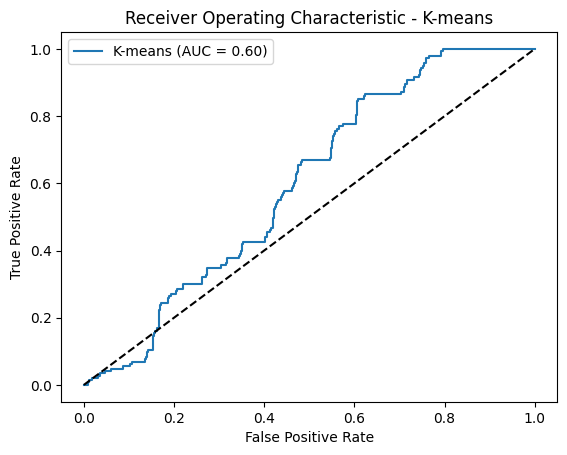

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Handle missing values in x_resampled
imputer = SimpleImputer(strategy='mean')
x_resampled_imputed = imputer.fit_transform(x_resampled)

# Perform feature scaling on x_resampled_imputed
scaler = StandardScaler()
x_resampled_scaled = scaler.fit_transform(x_resampled_imputed)

# Fit K-means on the scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_resampled_scaled)

# Calculate the distances to the cluster centroids
distances = kmeans.transform(x_resampled_scaled)

# Use the minimum distance as the anomaly score
anomaly_scores = np.min(distances, axis=1)

# Calculate false positive rate, true positive rate, and thresholds
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_resampled, anomaly_scores)

# Calculate the AUC score
auc_kmeans = roc_auc_score(y_resampled, anomaly_scores)

# Plot the ROC curve
plt.plot(fpr_kmeans, tpr_kmeans, label='K-means (AUC = {:.2f})'.format(auc_kmeans))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - K-means')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and train the K-means clustering algorithm
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(x_resampled_imputed)

# Obtain the cluster assignments for the data points
cluster_labels = kmeans.predict(x_resampled_imputed)

# Perform further analysis or processing on the cluster assignments or centroids
# ..

# Evaluate the performance of the clustering algorithm
silhouette_score_value = silhouette_score(x_resampled_imputed, cluster_labels)
print("Silhouette Score:", silhouette_score_value)


In [71]:
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

# Handle missing values in x_resampled
imputer = SimpleImputer(strategy='mean')
x_resampled_imputed = imputer.fit_transform(x_resampled)

# Perform feature scaling on x_resampled_imputed
scaler = StandardScaler()
x_resampled_scaled = scaler.fit_transform(x_resampled_imputed)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Make predictions on the testing set
y_pred_ann_probs = model.predict(x_test)
y_pred_ann = (y_pred_ann_probs > 0.5).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_ann)
print("Mean Absolute Error:", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_ann)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred_ann)
print("R^2 Score:", r2)


Epoch 1/10
9623/9623 [==============================] - 15s 1ms/step - loss: 0.1335 - accuracy: 0.9428 - val_loss: 0.0804 - val_accuracy: 0.9675
Epoch 2/10
9623/9623 [==============================] - 14s 1ms/step - loss: 0.0781 - accuracy: 0.9689 - val_loss: 0.0605 - val_accuracy: 0.9709
Epoch 3/10
9623/9623 [==============================] - 14s 1ms/step - loss: 0.0621 - accuracy: 0.9776 - val_loss: 0.0481 - val_accuracy: 0.9871
Epoch 4/10
9623/9623 [==============================] - 14s 1ms/step - loss: 0.0529 - accuracy: 0.9825 - val_loss: 0.0435 - val_accuracy: 0.9854
Epoch 5/10
9623/9623 [==============================] - 15s 2ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0467 - val_accuracy: 0.9824
Epoch 6/10
9623/9623 [==============================] - 14s 1ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 7/10
9623/9623 [==============================] - 14s 1ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0290 - val_ac

2406/2406 [==============================] - 2s 834us/step


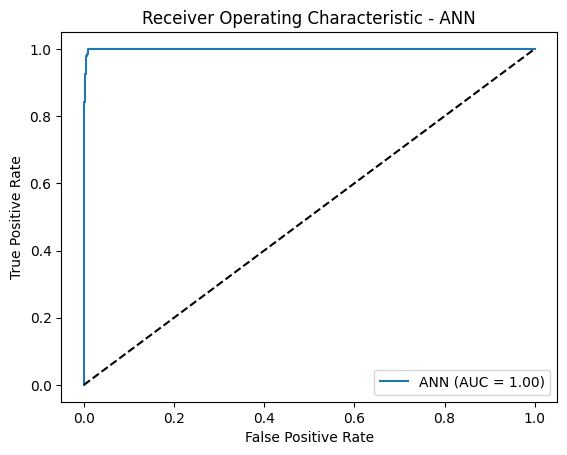

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class
y_pred_proba_ann = model_ann.predict(x_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

# Calculate the AUC score
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)

# Plot the ROC curve
plt.plot(fpr_ann, tpr_ann, label='ANN (AUC = {:.2f})'.format(auc_ann))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ANN')
plt.legend()
plt.show()


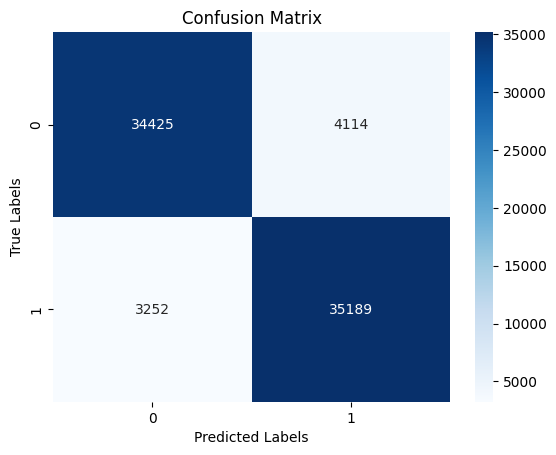

In [103]:
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize and fit the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42)
mlp.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix plot using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set plot labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


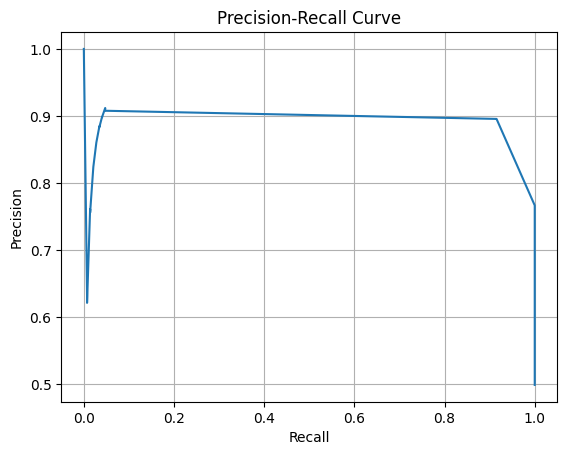

In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Initialize and fit the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42)
mlp.fit(x_train, y_train)

# Generate predicted probabilities for the positive class
y_pred_proba = mlp.predict_proba(x_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


Accuracy: 0.9752663029358275
Precision: 0.9999452669604006
Recall: 0.9505215785229313
F1-score: 0.9746072390707105
Mean Absolute Error: 0.024733697064172513
Mean Squared Error: 0.024733697064172513
R^2 Score: 0.9010650514017626


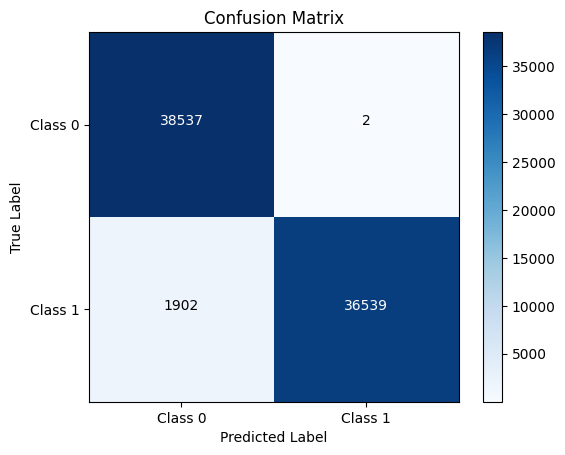

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

# Define individual classifiers
random_forest = RandomForestClassifier(random_state=42)
ann = MLPClassifier(random_state=42)

# Define the ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[('rf', random_forest), ('ann', ann)],
    voting='hard'
)

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(x_train, y_train)

# Make predictions using the ensemble classifier
y_pred = ensemble_classifier.predict(x_test)

# Evaluate the performance of the ensemble classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to each cell
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [113]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KMeans clustering on the training set
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Obtain cluster labels for the training and testing sets
X_train_clusters = kmeans.transform(X_train)
X_test_clusters = kmeans.transform(X_test)

# Concatenate the original features with the cluster distances
X_train_new = np.concatenate((X_train, X_train_clusters), axis=1)
X_test_new = np.concatenate((X_test, X_test_clusters), axis=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest classifier on the training set with new features
rf_classifier.fit(X_train_new, y_train)

# Make predictions on the testing set with new features
y_pred_rf = rf_classifier.predict(X_test_new)

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:")
print(cm_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random Forest Metrics:
Accuracy: 0.865
Precision: 0.9038461538461539
Recall: 0.8468468468468469
F1-score: 0.8744186046511627
Confusion Matrix:
[[79 10]
 [17 94]]
